In [1]:
import numpy as np
from math import sin, cos, radians
import matplotlib.pyplot as plt

In [3]:
radians(30)

0.5235987755982988

In [6]:
sin(30)

-0.9880316240928618

In [7]:
sin(radians(30))

0.49999999999999994

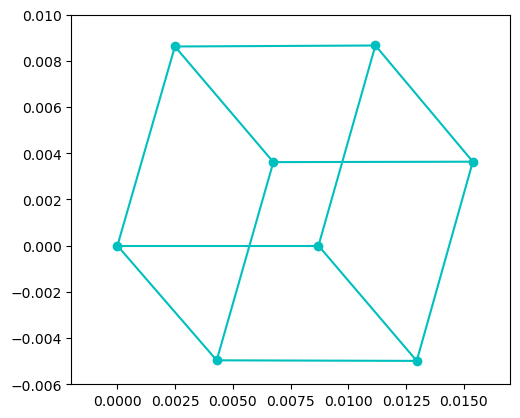

In [ ]:
# 3d 世界坐标系 homogeneous coordinates 的一个立方体的八个点的坐标
P = np.array([[0,0,0,1],[0,0,1,1],[0,1,0,1],[0,1,1,1],
              [1,0,0,1],[1,0,1,1],[1,1,0,1],[1,1,1,1]])

# transformation matrix
Rx = radians(30)  # 度数转为弧度，pi/6
Ry = radians(30)
Rz = radians(0)
Tx = 0
Ty = 0
Tz = 100  # 距离光圈所在平面 100
f = 1  # focal length

# Intrinsic matrix
K = np.array([
    [f, 0, 0],
    [0, f, 0],
    [0, 0, 1]
])

# rotation matrix
RMx = np.array([[1, 0, 0],
                [0, cos(Rx), -sin(Rx)],
                [0, sin(Rx), cos(Rx)]])

RMy = np.array([[cos(Ry), 0, sin(Ry)],
                [0, 1, 0],
                [-sin(Ry), 0, cos(Ry)]])

RMz = np.array([[cos(Rz), -sin(Rz), 0],
                [sin(Rz), cos(Rz), 0],
                [0, 0, 1]])
# RM = RMx @ RMy @ RMz
RM = RMz @ RMy @ RMx

# Extrinsic matrix
M = np.zeros((3, 4))
M[0:3, 0:3] = RM
M[0, 3] = Tx
M[1, 3] = Ty
M[2, 3] = Tz

# Perspective projection
p = K @ M @ P.T  # Projection in homogeneous coordinates

# Convert to non-homogeneous coordinates
x = p[0, :] / p[2, :]
y = p[1, :] / p[2, :]

# Plotting
plt.figure()
plt.plot(x, y, 'co')  # Plot points
for start, end in [(0, 1), (0, 2), (0, 4), (1, 3), (1, 5), (2, 3), (2, 6), (3, 7), (4, 5), (4, 6), (5, 7), (6, 7)]:
    plt.plot([x[start], x[end]], [y[start], y[end]], 'c-')
plt.xlim(-0.002, 0.017)
plt.ylim(-0.006, 0.010)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [15]:
x

array([0.        , 0.00429789, 0.00248922, 0.00675027, 0.00870377,
       0.01295799, 0.01116774, 0.0153853 ])

In [16]:
y

array([ 0.        , -0.00496278,  0.00862292,  0.00361746,  0.        ,
       -0.00498753,  0.00866606,  0.00363542])